# Model Evaluator for Arthropod Detection

This notebook evaluates a TensorFlow model trained to classify various arthropod species. It includes sections for loading the model, preparing the validation dataset, and calculating evaluation metrics, such as the confusion matrix and classification report, to assess model performance.

## Import Libraries

Import necessary libraries for model evaluation, image preprocessing, and visualization. Key libraries include TensorFlow for loading the model, `sklearn` for evaluation metrics, and `matplotlib` for visualizations.


In [ ]:
import tensorflow as tf
from jupyterUtils import *
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import os
import json

## Load the Pre-Trained Model

Load the trained model from the specified file path. Ensure that the model file path is correct and that it matches the model architecture and data used for training.


In [ ]:
model_path   = '../models/BasicArthropodClassifier'

progress_bar = ProgressBar(message="Loading Model")
model        = tf.keras.models.load_model(model_path)
with open(os.path.join(model_path, "class_names.json"), "r") as file:
    class_names = json.load(file)

progress_bar.stop()
model.summary()

## Predict a Single Image

Choose an image to run through the model. The image will be rescaled, normalized, evaluated by the model



1/1 [==============================] - 0s 33ms/step
Classifying Image /

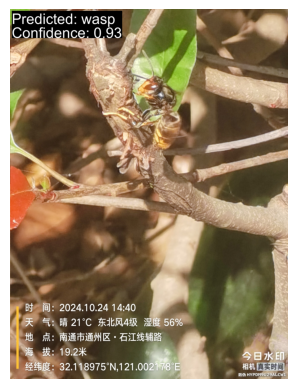

Predicted Class: wasp, Confidence: 0.93


In [31]:
class_names = ["bee", "beetle", "moth", "spider", "wasp"]
image_path   = "../data/images/wasp/wasp_4.jpg"
progress_bar.stop()
progress_bar = ProgressBar(message="Classifying Image")
predict_image(model, image_path, class_names, 80)
progress_bar.stop()

## Load Validation Dataset

Load and preprocess an entire validation dataset. This dataset will be used to evaluate the model's performance and provide insight into how well the model generalizes to unseen data.

In [ ]:
progress_bar = ProgressBar(message="Creating Validaton Dataset")

validation_dataset = create_normalized_dataset(
    dataset_dir      = '../data/images',
    validation_split = 0.2,
    subset           = "validation",
    seed             = 123,
    image_size       = (224, 224),
    batch_size       = 32
)
progress_bar.stop()


## Evaluate the Model on the Validation Dataset

Evaluate the model using the validation dataset


In [ ]:
progress_bar = ProgressBar(message="Evaluating Validation Set")

true, predicted = evaluate_dataset(model, validation_dataset)

progress_bar.stop()

## Confusion Matrix

Generate and display the confusion matrix. The confusion matrix provides a detailed breakdown of how often the model correctly classifies each class and where it makes mistakes, which can help identify any particular classes the model struggles with.


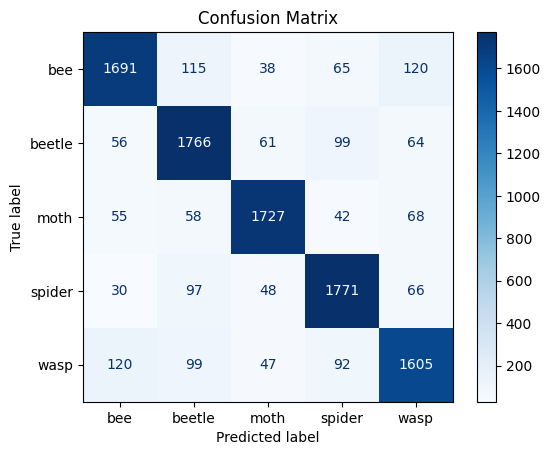

In [22]:
cm = confusion_matrix(true, predicted)

# Display the confusion matrix using a heatmap
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=validation_dataset.class_names).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Classification Report

Generate a classification report that includes precision, recall, and F1-score for each class. These metrics give a more comprehensive picture of model performance across different classes, helping to understand how well the model performs beyond simple accuracy.


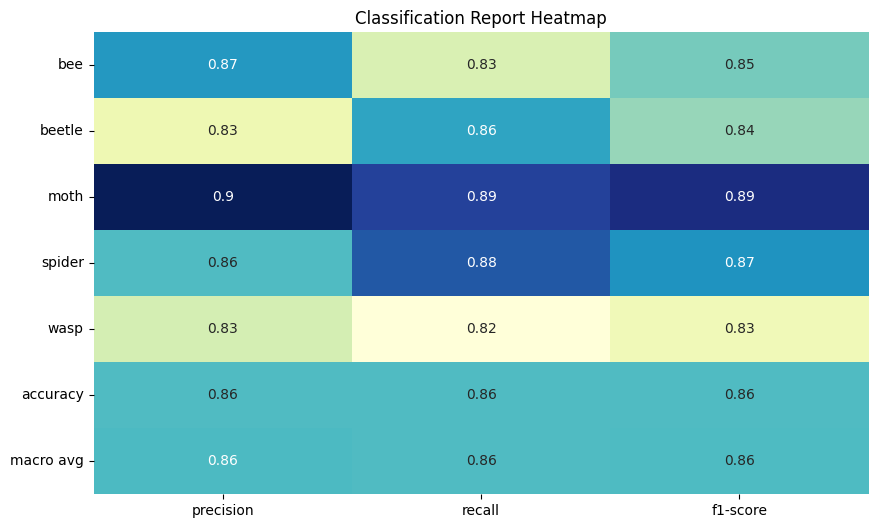

In [23]:
# Generate the classification report as a dictionary
report = classification_report(true, predicted, target_names=validation_dataset.class_names, output_dict=True)

# Convert to DataFrame for easier visualization
report_df = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', cbar=False)
plt.title("Classification Report Heatmap")
plt.show()
